In [3]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [4]:
df = pd.read_csv('datasets-1/bitcointweets.csv')

In [5]:
df

,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral']
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
...,...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,5673,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,372,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,557,0,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,3,0,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [6]:
# od twitovite odreduvame dali ni e pozitivno, negativno ili neutralno i spored vestite i tvitovite ke vidime dali BTC ke raste ili ne 

#pravam koloni

df.columns = ['date', 'text', 'user', 'id', 'unknown', 'hashtags', 'url', 'sentiment_values']

In [7]:
df.drop(columns=['id', 'unknown'], inplace=True)

In [8]:
df

,date,text,user,hashtags,url,sentiment_values
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [9]:
df.sentiment_values.value_counts()

sentiment_values
['positive']    22937
['neutral']     21938
['negative']     5983
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='sentiment_values'>

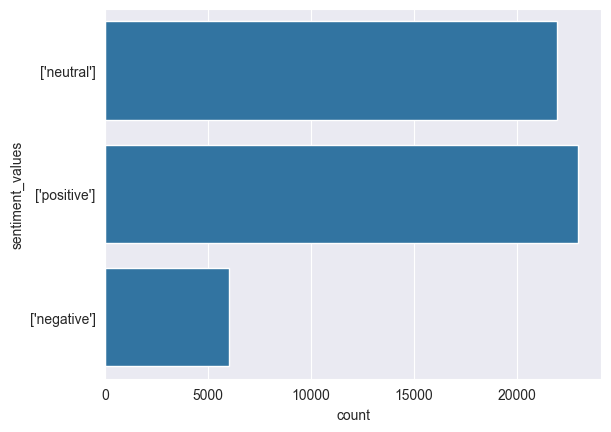

In [10]:
sns.countplot(df.sentiment_values) # ne ni e balansiran 

In [11]:
# kolku ni se dolgi tekstovite 

df['text_length'] = df['text'].apply(len) #dodava length 

In [12]:
df

,date,text,user,hashtags,url,sentiment_values,text_length
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],137
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],34
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],146
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],138
...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],140
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive'],121


In [13]:
df

,date,text,user,hashtags,url,sentiment_values,text_length
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],137
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],34
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],146
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],138
...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],140
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive'],121


In [14]:
x = df['text']
y = pd.get_dummies(df['sentiment_values']) #samo za y gi pravam so one hot 

In [15]:
y

,['negative'],['neutral'],['positive']
0,False,True,False
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
50853,False,False,True
50854,False,False,True
50855,False,True,False
50856,False,False,True


In [16]:
x

0        @lopp @_Kevin_Pham @psycho_sage @naval But @Pr...
1        RT @tippereconomy: Another use case for #block...
2                       free coins https://t.co/DiuoePJdap
3        RT @payvxofficial: WE are happy to announce th...
4        Copy successful traders automatically with Bit...
                               ...                        
50853    RT @fixy_app: Fixy Network brings popular cryp...
50854    RT @bethereumteam: After a successful launch o...
50855    RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...
50856    I added a video to a @YouTube playlist https:/...
50857    RT @Raybambs: Airdrop PhotoCoin Airdrop Round#...
Name: text, Length: 50858, dtype: object

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## NLP - TOKENIZER

In [53]:
# sakame od ovoj tekst da dobieme vektor od brojki - embeddings 

from tensorflow.keras.preprocessing.text import Tokenizer #davame tekst i ni dava sekvenca od brojki 

max_features = 20000 # The max_features = 20000 parameter in the Tokenizer initialization specifies the maximum number of words to keep based on word frequency. This means that only the top 20,000 most frequent words in the dataset will be considered, and the rest will be ignored.
tokenizer = Tokenizer(num_words=max_features) #max zborovi

tokenizer.fit_on_texts(list(x_train))

In [54]:
x_train = tokenizer.texts_to_sequences(x_train)

In [55]:
x_train # sega se brojcinja i tie se dvizat do 10000, gi napravime zborovite vo zborcinja

[[5,
  690,
  1134,
  32,
  164,
  4,
  128,
  1226,
  33,
  32,
  1039,
  8,
  127,
  37,
  1007,
  144,
  51,
  75,
  33,
  12,
  6,
  484,
  1,
  2,
  3,
  1632,
  245],
 [248, 130, 1, 2, 3, 15456, 15457, 15458, 15459, 15460, 15461, 1, 2, 3, 15462],
 [5, 8749, 24, 7449, 4, 38, 623, 8750, 2456, 128, 403, 7, 626, 58],
 [775,
  313,
  1906,
  1284,
  1146,
  17,
  812,
  1397,
  1347,
  4,
  2216,
  1,
  2,
  3,
  10746,
  313],
 [102,
  59,
  62,
  166,
  563,
  1633,
  530,
  1,
  2,
  3,
  15463,
  15464,
  15465,
  15466,
  15467,
  1,
  2,
  3,
  15468],
 [4,
  12,
  7450,
  1907,
  2217,
  10,
  8,
  3058,
  18,
  8,
  1052,
  120,
  749,
  70,
  26,
  14,
  1,
  2,
  3,
  15469],
 [5,
  208,
  379,
  380,
  381,
  344,
  7,
  92,
  8,
  168,
  155,
  354,
  382,
  282,
  383,
  368,
  384],
 [5,
  739,
  153,
  44,
  504,
  20,
  310,
  7,
  164,
  43,
  868,
  1170,
  246,
  14,
  19,
  4,
  23,
  1197],
 [5,
  1053,
  952,
  1022,
  14,
  40,
  4,
  224,
  953,
  172,
  12,
  

In [56]:
x_test = tokenizer.texts_to_sequences(x_test)

In [57]:
# mora da napravime site recenici da ni imaat ista dolzina 
total = [len(text) for text in x_train]

In [40]:
total

[22,
 17,
 24,
 22,
 20,
 18,
 18,
 24,
 18,
 17,
 27,
 14,
 22,
 16,
 22,
 22,
 10,
 11,
 19,
 22,
 18,
 20,
 13,
 14,
 23,
 17,
 24,
 24,
 15,
 24,
 17,
 10,
 24,
 19,
 23,
 19,
 17,
 18,
 24,
 16,
 18,
 23,
 22,
 21,
 22,
 22,
 19,
 21,
 21,
 19,
 25,
 17,
 22,
 20,
 20,
 19,
 20,
 14,
 18,
 27,
 14,
 13,
 16,
 24,
 22,
 22,
 17,
 10,
 18,
 19,
 21,
 20,
 24,
 13,
 24,
 13,
 17,
 17,
 20,
 24,
 24,
 4,
 13,
 11,
 23,
 22,
 23,
 11,
 22,
 12,
 23,
 19,
 14,
 20,
 22,
 6,
 19,
 24,
 24,
 18,
 17,
 15,
 27,
 23,
 13,
 20,
 14,
 28,
 20,
 11,
 19,
 18,
 20,
 10,
 17,
 20,
 23,
 15,
 23,
 18,
 8,
 26,
 13,
 18,
 17,
 19,
 22,
 19,
 22,
 24,
 8,
 21,
 9,
 16,
 21,
 14,
 24,
 14,
 20,
 22,
 20,
 22,
 12,
 16,
 24,
 6,
 16,
 13,
 12,
 16,
 16,
 25,
 20,
 24,
 23,
 13,
 20,
 22,
 19,
 23,
 13,
 20,
 17,
 19,
 18,
 20,
 20,
 23,
 6,
 14,
 22,
 20,
 24,
 19,
 22,
 21,
 11,
 18,
 25,
 25,
 16,
 14,
 22,
 24,
 18,
 18,
 17,
 19,
 20,
 8,
 24,
 18,
 22,
 23,
 17,
 21,
 17,
 22,
 18,
 21,
 27,
 21

(array([3.200e+01, 3.400e+01, 1.450e+02, 1.850e+02, 5.970e+02, 3.720e+02,
        3.540e+02, 4.030e+02, 1.441e+03, 1.109e+03, 1.243e+03, 1.653e+03,
        4.269e+03, 2.814e+03, 4.272e+03, 3.786e+03, 3.446e+03, 6.687e+03,
        3.762e+03, 1.978e+03, 1.055e+03, 8.020e+02, 1.900e+02, 3.200e+01,
        1.600e+01, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 1.        ,  2.23333333,  3.46666667,  4.7       ,  5.93333333,
         7.16666667,  8.4       ,  9.63333333, 10.86666667, 12.1       ,
        13.33333333, 14.56666667, 15.8       , 17.03333333, 18.26666667,
        19.5       , 20.73333333, 21.96666667, 23.2       , 24.43333333,
        25.66666667, 26.9       , 28.13333333, 29.36666667, 30.6       ,
        31.83333333, 33.06666667, 34.3       , 35.53333333, 36.76666667,
        38.        ]),
 <BarContainer object of 30 artists>)

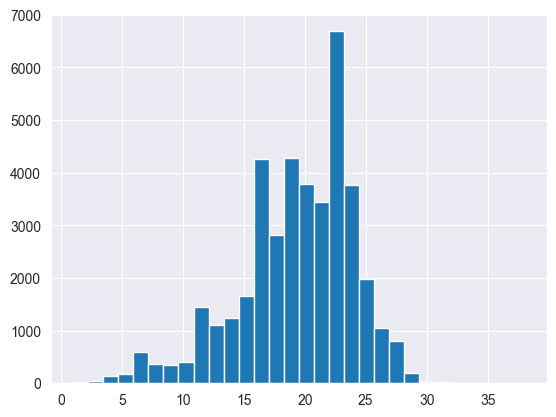

In [58]:
plt.hist(total, bins=30)

In [60]:
max_words = 23 #spored histogramot gledam
# maximum length of the sequences (i.e., the number of words) that will be fed into the neural network

In [44]:
np.average(total)

18.907732389519737

ako imame max=5 i ako vo edna lista imame pomalku ke dodade 0 za ostanatite, dodeka ako ima poveke ke gi skrati 

pad_sequence - dodava ili ja smaluva dadenata recenica 

sequence.pad_sequences is a function from the tensorflow.keras.preprocessing module that pads sequences to the same length. This is useful when you have sequences of different lengths and you need them to be of the same length for input into a neural network.

In [61]:
from keras.preprocessing import sequence
from keras.layers import Embedding, Conv1D, MaxPool1D

#sequences are a list of integers waiting to be padded

x_train = sequence.pad_sequences(x_train, maxlen=max_words) #ke napravi padding, potocno ke ja smali dadenata recenica - ke ja skrati listata
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

input_dim: This is the size of the vocabulary. It defines the maximum integer index + 1. In your case, input_dim=max_words means the vocabulary size is max_words.
output_dim: This is the dimension of the dense embedding. It defines the size of the dense vector for each word. In your case, output_dim=150 means each word will be represented by a 150-dimensional vector.
input_length: This is the length of input sequences. It defines the length of input sequences to the layer. In your case, input_length=max_words means each input sequence will have a length of max_words.

In [62]:
model = Sequential()

#vlezen sloj
model.add(Embedding(max_features, 23, input_length=x_train.shape[1] )) #The Embedding layer in Keras is used to convert positive integers (indexes) into dense vectors of fixed size. This is useful for text data where each word is represented by an integer index.

#hidden layer 
model.add(Conv1D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool1D(pool_size=2 ))
model.add(Conv1D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool1D(pool_size=2 ))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

#output layer
model.add(Dense(3,activation='softmax')) #3 nevroni na izlez bidejki y ima 3 izlezi
# The softmax activation function is used in the output layer of a neural network when performing multi-class classification. It converts the raw output scores (logits) into probabilities, which sum to 1, making it suitable for classification tasks where each input belongs to one of several classes. 
# In your case, the output layer has 3 neurons because there are 3 classes in your target variable y. 
# The softmax function ensures that the output of the network represents the probability distribution over these 3 classes. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [63]:
model.compile(loss='categorical_crossentropy', optimizer='adam') #koga imame poveke katergorii

In [64]:
model.fit(x_train, y_train, batch_size=128, epochs = 10, validation_split=0.2)

Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.7190 - val_loss: 0.1449
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0976 - val_loss: 0.1056
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0392 - val_loss: 0.1095
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0188 - val_loss: 0.1230
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0138 - val_loss: 0.1394
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0099 - val_loss: 0.1398
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0081 - val_loss: 0.1388
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0050 - val_loss: 0.1321
Epoch 9/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0066 - val_loss: 0.1731
Epoch 10/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0048 - val_loss: 0.1497


In [65]:
y_pred = model.predict(x_test)

318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [66]:
y_pred = y_pred.round()

In [67]:
y_pred

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [68]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

print(f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

0.9688237608182534
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1187
           1       0.97      0.98      0.97      4324
           2       0.98      0.97      0.98      4661

   micro avg       0.97      0.97      0.97     10172
   macro avg       0.96      0.96      0.96     10172
weighted avg       0.97      0.97      0.97     10172
 samples avg       0.97      0.97      0.97     10172



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
